## Keras 
1. High-level open source framework. 
2. Use low level frameworks Theano and Tensorflow
3. Keras is a wrapper around a backend library, so a backend like TensorFlow, Theano, CNTK, etc must be provided.

## Deep learning 
1. In ML, some expert has to do feature engineering which is very important step
2. In DL, feature engineering + predicting both done by model.
    - `Hidden Layer: Do the feature engineering (try to find out better features)
    - `Classification Layer: Last do the classification
3. Use DL when 
    - we have **unstructured data**. Unstructured data like images, sound, video
        - Hard to do feature engineering on Unstructured data 
    - When we don't want our results to be explainatary/interpretable
        - It is complex to explain the results of a DL model
        - Because it is challenging to know exactly what is going in those hidden layers

## Neural Network 
1. A **non-constrained** output can be obtained by avoiding setting an activation function in the output layer. 
    - This is useful for problems like regression, when we want our output to be able to take any non-constrained value.
    - Non-constrained meaning range (-inf, inf)
2. Neural networks learn according to the data they are fed with. Data quality and diversity are very important

**Note: Predicting on training data inputs before training can help you quickly check that your model works as expected. It checks the flow of code is correct, input and output are correct.**

In [1]:
def plot_orbit(model_preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Predicted orbit vs Scientist's Orbit")
  plt.show()

## Activation Function and losses

1. Binary_crossentropy: Used for binary classification. 
    - Use this loss when output neuron has activation fn as SIGMOID
2. `categorical_crossentropy`: Used in multi-class classification
2. Sigmoid Activation gives output btw 0 to 1, this can be interperated as probability of output class 


In [7]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import to_categorical 
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# All datasets 

# Banknotes
banknotes = pd.read_csv("datasets/banknotes.csv")
banknotes_features = banknotes.drop(columns='class').values
banknotes_target = banknotes['class'].values

# irrigation 


# darts 


# digits mnist
mnist = pd.read_csv("datasets/mnist.csv", names=['label'] + [ 'feat-'+str(i) for i in range(1,785)])
mnist_labels = mnist['label'].values
mnist_features = mnist.drop(columns='label').values

# 
lmnist = pd.read_csv("datasets/slmnist.csv")

In [9]:
# Banknotes fake or real classification 
banknotes = pd.read_csv("datasets/banknotes.csv")
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
banknotes.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [11]:
# Get the counts of different classes of labels 
banknotes['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [2]:
# EDA: explore the data 
import seaborn as sns 

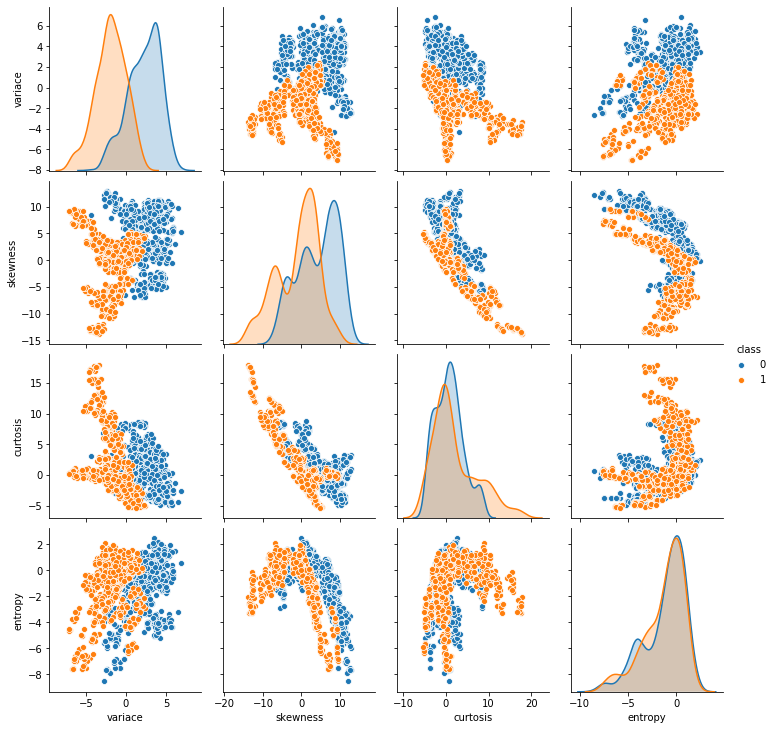

In [17]:
sns.pairplot(banknotes, hue='class')

In [18]:
# You can see data is separable on some features very easily such as (variance, skewness) 

In [20]:
features = banknotes.drop(columns='class').values
target = banknotes['class'].values
print(features.shape, target.shape)

(1372, 4) (1372,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(features, target, test_size=0.1, stratify= target)
print(X_train.shape, y_train.shape)

(1234, 4) (1234,)


In [23]:
# Simple model with no hidden layers (same as Logistic Regression)
model1 = Sequential()
model1.add(Dense(1, activation='sigmoid', input_shape=(4,)))

In [26]:
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model1.fit(features, target, epochs=20)

Epoch 1/20
43/43 [==============================] - 0s 1ms/step - loss: 1.9809 - accuracy: 0.5219
Epoch 2/20
43/43 [==============================] - 0s 1ms/step - loss: 0.9768 - accuracy: 0.5860
Epoch 3/20
43/43 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7886
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.9155
Epoch 5/20
43/43 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9483
Epoch 6/20
43/43 [==============================] - 0s 1ms/step - loss: 0.2073 - accuracy: 0.9497
Epoch 7/20
43/43 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9541
Epoch 8/20
43/43 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9599
Epoch 9/20
43/43 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9614
Epoch 10/20
43/43 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9636
Epoch 11/20
43/43 [

In [28]:
model1.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9638


[0.12357524037361145, 0.9637681245803833]

In [3]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

In [5]:
plot_model(None, to_file='models/banknotes-0-hidden.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Multi-Class Classification 

In [2]:
darts = pd.read_csv("datasets/darts.csv")
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


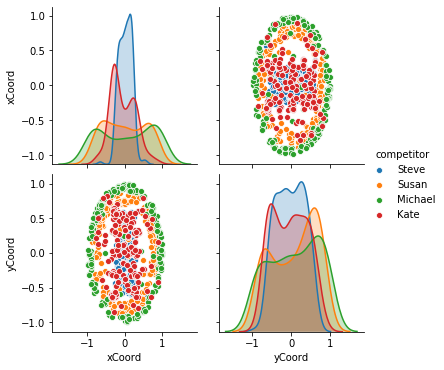

In [7]:
# Visualize the data using pair plot 
sns.pairplot(darts, hue='competitor')

## Doubt: Not able to understand this data and use of 'pairplot'

In [6]:
# Preprocessing the data 
# Labels = string-format (4 classes)
# Convert strings to one-hot encoding: First convert strings to numbers then numbers to one-hot encoding
# E.g (Steve, Susan, Michael, Kate) --> (0,1,2,3) then they are converted to one-hot encoding

darts.competitor= pd.Categorical(darts.competitor) # returns a Categorical Object, this object get type 
# cast to series object when assigned to column of dataframe
darts.competitor= darts.competitor.cat.codes # To get codes in place of strings use 'SeriesObject.cat.codes'
# Same can be done using: x = pd.Categorical(darts.competitor);  target= x.codes (not x.cat.codes)
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,2
1,0.476027,-0.306763,3
2,0.003175,-0.980736,1
3,0.294078,0.267566,0
4,-0.051120,0.598946,2


In [20]:
# Now convert them to one-hot encoding 
from tensorflow.keras.utils import to_categorical
target = to_categorical(darts.competitor)
print(target.shape)
target[:5]

(800, 4)


array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [23]:
feature_coord = darts.drop(columns='competitor').values
print(feature_coord.shape)
feature_coord[:5]

(800, 2)


array([[ 0.19645146, -0.52034058],
       [ 0.47602674, -0.30676266],
       [ 0.00317496, -0.98073612],
       [ 0.29407826,  0.26756577],
       [-0.05111981,  0.59894561]])

In [25]:
# Defining the model 
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(2,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(4, activation='softmax'))

# model compilation
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature_coord, target, test_size=0.2, \
                                                    stratify=darts.competitor)
print(X_train.shape, y_train.shape)

(640, 2) (640, 4)


In [36]:
# Checking the class balance
tf.reduce_sum(y_test, axis=0)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([40., 40., 40., 40.], dtype=float32)>

In [37]:
tf.reduce_sum(target, axis=0)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([200., 200., 200., 200.], dtype=float32)>

In [40]:
# model fitting 
# I first trained this on 200 epochs then again ran this cell for 20 epochs,
# because ouput was too long for 200 epochs to be displayed
model2.fit(X_train, y_train, epochs=20)

Epoch 1/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.8016
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.8172
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8250
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.8250
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8234
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8313
Epoch 7/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8203
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8219
Epoch 9/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8266
Epoch 10/20
20/20 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.8250
Epoch 11/20
20/20 [

In [41]:
model2.evaluate(X_test, y_test)
# return 2 things loss and accuracy

5/5 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.8062


[0.7006869316101074, 0.8062499761581421]

In [45]:
# Making the predictions 
predictions = model2.predict(X_test)
predictions[:10]
# 2D array each row 4 columns representing probability of each output class

array([[7.08407862e-03, 1.19144849e-01, 3.81818577e-03, 8.69952917e-01],
       [8.08714747e-01, 1.18133863e-02, 1.04714267e-01, 7.47576207e-02],
       [5.08854575e-02, 1.95563450e-01, 3.39896195e-02, 7.19561458e-01],
       [7.92248696e-02, 1.86286345e-01, 1.10476976e-02, 7.23441064e-01],
       [6.70046508e-01, 2.24176589e-02, 1.00767836e-01, 2.06767917e-01],
       [1.33716986e-01, 2.17292295e-03, 8.24538648e-01, 3.95714715e-02],
       [5.85064828e-01, 1.05745774e-02, 3.85204345e-01, 1.91562455e-02],
       [3.25004794e-02, 5.27294390e-02, 2.39783956e-04, 9.14530337e-01],
       [2.56896466e-01, 3.31766725e-01, 1.39986426e-01, 2.71350414e-01],
       [1.81391940e-01, 3.95833561e-03, 1.00127645e-02, 8.04636955e-01]],
      dtype=float32)

In [46]:
# Deciding the final label from the probabilities 
preds = [np.argmax(pred) for pred in predictions]
preds[:10]

[3, 0, 3, 3, 0, 2, 0, 3, 1, 3]

# Multi-label Classification 
1. Each input can belong to zero or more no. of classes.
2. Architecture is similar to Multi-class but with some difference 
    - We no longer want probability distribution over output classes.
        - We care about individual probabilities now(so we use *sigmoid*)
    - We change the Activation function of output layer from **softmax** to `sigmoid` 
        - Each output neuron, gives the probability of input being in that class, we can choose multiple labels for a input by defining a threshold for this probability. 
    - We will use `binary_crossentropy` as loss. This architecture can be interpreted as *we are training several binary classifiers* similar to **one vs rest**
3. There can be a possible scenario when input doesn't belong to any class. When probability of each output neuron is very low.

In [3]:
# Watering the farm 
# Input: reading from sensors in volts , Output: one-hot-encoding, representing which farm field/parcel 
# to water
irrigation_data = pd.read_csv("datasets/irrigation_machine.csv", usecols=range(1,24))
irrigation_data.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [4]:
irrigation_data.describe()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [5]:
irrigation_features = irrigation_data.drop(columns=['parcel_0','parcel_1','parcel_2']).values
irrigation_target = irrigation_data[['parcel_0','parcel_1','parcel_2']].values
print(irrigation_features.shape, irrigation_target.shape)

(2000, 20) (2000, 3)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(irrigation_features, irrigation_target, test_size=0.2)
print(X_train.shape, y_train.shape)

(1600, 20) (1600, 3)


In [6]:
# Define the architecture
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(20,)))
model3.add(Dense(3, activation='sigmoid'))

In [7]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6038 - accuracy: 0.4195 - val_loss: 0.5052 - val_accuracy: 0.5312
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.5633 - val_loss: 0.4143 - val_accuracy: 0.6062
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.6172 - val_loss: 0.3697 - val_accuracy: 0.6094
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.6164 - val_loss: 0.3460 - val_accuracy: 0.5938
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.6187 - val_loss: 0.3296 - val_accuracy: 0.6031
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.6258 - val_loss: 0.3107 - val_accuracy: 0.5781
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.6164 - val_loss: 0.3009 - val_accuracy: 0.6187
Epoch 8/100
4

In [11]:
model3.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.5500


[0.2836786210536957, 0.550000011920929]

In [12]:
predictions = model3.predict(X_test)
predictions[:5]

array([[0.9975874 , 0.9992744 , 0.9905505 ],
       [0.03170338, 0.13267344, 0.0757266 ],
       [0.0042634 , 1.        , 0.0106031 ],
       [0.569461  , 0.9999232 , 0.03269336],
       [0.9963906 , 0.99975234, 0.00195262]], dtype=float32)

In [13]:
# Put a threshold of 0.5 if output >0.5 then that label is present 
pred_labels = np.round(predictions)
pred_labels[:5]

array([[1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.]], dtype=float32)

# Callbacks
1. They are piece of code that is called after an event, function or task is finished. 
2. `history callback`
    - `model.fit()` method returns the history object. 
    - It stores the history of model training after each epoch. 
    - It stores the metrics such as 'loss', 'accuracy', 'val_loss', 'val_acc'. 
    - `history_obj.history` history attribute of this object gives python dictionary with all metrics.
3. `EarlyStopping`
    - This allows model training to stop if the model performance is not improving after a given no. of epochs
    - `from keras.callbacks import EarlyStopping`
    - `earlystopping_obj = EarlyStopping(monitor='val_loss', patience=5)`
    - `model.fit(X,y, epochs=500, callbacks = [ earlystopping_obj ]`
        - **monitor** arguement specifies according to which metric we have to monitor the model performance and training will be stopped if this metric is not improving. 
        - **patience** arguement specifies for how epochs if we have to wait for model to improve. If patience=5, it says if model is not improving for last 5 epochs then stop training.
        - EarlyStopping Object is passed to the **callbacks** argument of **.fit()** method
    - Now you won't ever fall short of epochs.
   
4. `ModelCheckpoint`
    - It allow us to save our model as it trains
    - `from keras.callbacks import ModelCheckpoint`
    - `model_save = ModelCheckpoint('model-file-name.hdf5', monitor='val_acc', save_best_only=True)`
    - `model.fit(X,y, epochs=50000000, callbacks = [ earlystopping_obj , model_save]`
        - **monitor** arguement specifies which metric to monitor, to decide the best model
        - **save_best_only=True** specifies that latest model corresponding to best value of metric will not be overwritten. Once our model obtained best number on the metric monitored, the model at that point of time will be saved in the filename.

In [29]:
# Irrigation model is not giving good results as we see in the above exercise. 
# Creating another model for it 

model4 = Sequential() #
# Add a hidden layer of 64 neurons and a 20 neuron's input
model4.add(Dense(64, activation='relu', input_shape=(20,)))
# Add an output layer of 3 neurons with sigmoid activation
model4.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model4.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


## Validation 
1. For Validation we can specify 2 things in .fit() method 
    - `model.fit(validation_split=0.2)`: A split from the training data, a kind of hold out data to validate the model after each updation. 
    - `model.fit(validation_data = (X_test, y_test))`: Passing validation data separately in the arguement validation_data

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 20) (1600, 3)
(400, 20) (400, 3)


In [18]:
# fit the model, returns the history object which is a callback
history_obj = model4.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, verbose=False)

In [21]:
# history object
history_obj.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Visualize the performance of model

In [22]:
import matplotlib.pyplot as plt

In [23]:

def plot_metric(train_metric, test_metric, metric_name='loss'):
    plt.figure()
    plt.plot(train_metric, label='train')
    plt.plot(test_metric, label='test')
    plt.ylabel(metric_name)
    plt.xlabel('epochs')
    plt.legend()
    plt.title('Model '+metric_name)
    plt.show()

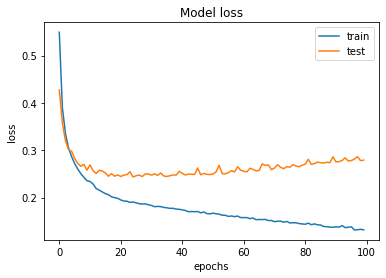

In [24]:
plot_metric(history_obj.history['loss'], history_obj.history['val_loss'], 'loss')

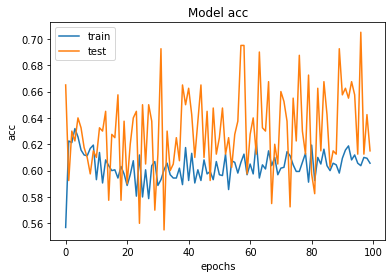

In [26]:
plot_metric(history_obj.history['accuracy'], history_obj.history['val_accuracy'], 'acc')

### Unstable Accuracy 

## Early Stopping and Model Checkpoint

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [44]:
model5 = Sequential() #
# Add a hidden layer of 64 neurons and a 20 neuron's input
model5.add(Dense(64, activation='relu', input_shape=(20,)))
# Add an output layer of 3 neurons with sigmoid activation
model5.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model5.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [45]:
# re-training the model using early stopping
early_stop_monitor = EarlyStopping(monitor='val_loss', patience=5)
checkpt_obj = ModelCheckpoint(filepath='models/irrigation_model.hdf5', monitor='val_loss', \
                             save_best_only=True)

hist_obj = model5.fit(X_train, y_train, epochs=50000, validation_data= (X_test,y_test), \
                      callbacks=[early_stop_monitor, checkpt_obj])

Epoch 1/50000
50/50 [==============================] - 0s 4ms/step - loss: 0.6262 - accuracy: 0.4169 - val_loss: 0.5123 - val_accuracy: 0.6425
Epoch 2/50000
50/50 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.6037 - val_loss: 0.4063 - val_accuracy: 0.7100
Epoch 3/50000
50/50 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.6338 - val_loss: 0.3503 - val_accuracy: 0.6575
Epoch 4/50000
50/50 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.6388 - val_loss: 0.3236 - val_accuracy: 0.6450
Epoch 5/50000
50/50 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.6244 - val_loss: 0.3139 - val_accuracy: 0.6575
Epoch 6/50000
50/50 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.6250 - val_loss: 0.3037 - val_accuracy: 0.6125
Epoch 7/50000
50/50 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.6162 - val_loss: 0.2969 - val_accuracy: 0.6400

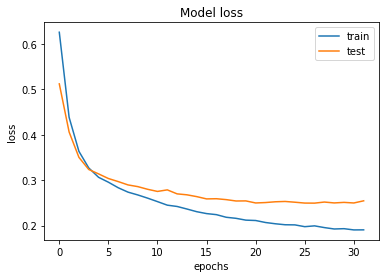

In [46]:
plot_metric(hist_obj.history['loss'], hist_obj.history['val_loss'])

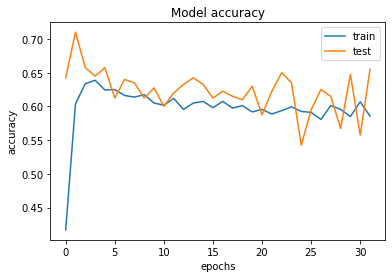

In [51]:
plot_metric(hist_obj.history['accuracy'], hist_obj.history['val_accuracy'], 'accuracy')

## Use the saved model 

In [47]:
from tensorflow.keras.models import load_model

In [48]:
irrigation_model = load_model('models/irrigation_model.hdf5')

In [49]:
irrigation_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [50]:
irrigation_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.2494 - accuracy: 0.6250


[0.24941390752792358, 0.625]

## Learning Curves 
1. **Overfitting** 
    - When train and test accuracy/loss starts to diverge(train metric improves but test metric get worse), then Overfitting starts to happen. 
2. **N.Nets can out-perform any other model given enough data** 
3. **When we can say, giving more Training Data will improve the performance** 
    - Draw the Learning Curve(Train & test metric vs train-size) keeping the model architecture same.
    - Initially when train data is small, model overfit
        - Train-metric-> HIGH & Test-metric-> Low 
    - On Increasing Train data 
        - Train-metric-> Tend to Decrease somewhat & Test-metric--> Starts to Improve
    - We can keep increasing the Train data till our Test-metric improves. 
    - When the Train-metric and Test metric curve become parallel then no use of providing more data
4. **Overfitting vs Convergence** 
    - Convergence: When loss/acc is not improving further, it kind of reached its optimum value, it kind of stay within small error limit of optimum value(no matter how much you train).
        - Curve gets flatten
    - Overfitting 
        - When validation/test accuracy/loss starts to get worse and Training metric improves. Model starts learning pecularities and doesn't generalize well on the test/val data. 
    - There can be scenario when Test loss is higher than Train loss but test loss is not increasing , it has attained a lower value possible, if it is neither improving nor getting worse then this is not Overfitting, it is convergence( even though Train loss < Test loss). Train metric has flattened

In [69]:
# Digits data 
digits = np.load("datasets/Digits/digits_pixels.npy")#pd.read_csv("datasets/Digits/digits_pixels.npy")
print(digits.shape)
print(type(digits))
print(digits.dtype)
digits_targets = np.load("datasets/Digits/digits_target.npy")
print(digits_targets.shape, type(digits_targets), digits_targets.dtype)

(1797, 64)
<class 'numpy.ndarray'>
float64
(1797,) <class 'numpy.ndarray'> int64


In [70]:
from collections import Counter

In [71]:
Counter(digits_targets)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [72]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(digits_targets)
labels[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
# Defining the Model Architecture
model5 = Sequential()
model5.add(Dense(16, activation='relu', input_shape=(64,)))
model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [82]:
X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size=0.3, stratify=targets)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1257, 64) (1257, 10)
(540, 64) (540, 10)


In [83]:
# get Model Initial Weights 
initial_weights = model5.get_weights()
initial_weights

[array([[ 0.24154067,  0.19497505,  0.1157091 , ...,  0.11153182,
          0.11591119, -0.13340773],
        [-0.15356621, -0.24895282,  0.14642748, ...,  0.27033317,
         -0.22733638,  0.09510753],
        [ 0.252968  ,  0.11826608,  0.09085104, ..., -0.18297413,
          0.04051927,  0.18692982],
        ...,
        [-0.09861347,  0.15342706, -0.14058787, ..., -0.09372194,
         -0.19327427,  0.07852784],
        [ 0.00137529, -0.10852805,  0.07331866, ...,  0.21767801,
          0.21404809,  0.22490478],
        [ 0.2270518 , -0.0789313 ,  0.19830814, ..., -0.006109  ,
         -0.12765999,  0.20006508]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[-0.02918291, -0.20100033, -0.2604771 ,  0.29741257,  0.15513486,
          0.27537048,  0.4399799 ,  0.40259326,  0.2709036 ,  0.24991697],
        [-0.26624152, -0.38173297,  0.23696643, -0.11814323, -0.35146558,
          0.23828077, -0.4781773 , -0.3

In [84]:
# Train the model on different Training Data size 
train_acc = []
test_acc = []
training_sizes = [125, 502, 879, 1255]
early_obj = EarlyStopping(monitor='loss', patience=1)
for size in training_sizes:
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]
    # reset the model weights to initial weights 
    model5.set_weights(initial_weights)
    model5.fit(X_train_frac, y_train_frac, epochs=60, callbacks=[early_obj])
    train_acc.append(model5.evaluate(X_train_frac, y_train_frac, verbose=0)[1])
    test_acc.append(model5.evaluate(X_test, y_test, verbose=0)[1])
    print('Done with size:',size)

Epoch 1/60
4/4 [==============================] - 0s 1ms/step - loss: 5.6150 - accuracy: 0.1440
Epoch 2/60
4/4 [==============================] - 0s 2ms/step - loss: 4.6252 - accuracy: 0.1360
Epoch 3/60
4/4 [==============================] - 0s 2ms/step - loss: 3.9816 - accuracy: 0.1680
Epoch 4/60
4/4 [==============================] - 0s 2ms/step - loss: 3.5198 - accuracy: 0.2160
Epoch 5/60
4/4 [==============================] - 0s 2ms/step - loss: 3.2108 - accuracy: 0.2560
Epoch 6/60
4/4 [==============================] - 0s 2ms/step - loss: 2.9510 - accuracy: 0.2560
Epoch 7/60
4/4 [==============================] - 0s 1ms/step - loss: 2.7459 - accuracy: 0.2640
Epoch 8/60
4/4 [==============================] - 0s 3ms/step - loss: 2.5530 - accuracy: 0.3120
Epoch 9/60
4/4 [==============================] - 0s 3ms/step - loss: 2.3752 - accuracy: 0.3040
Epoch 10/60
4/4 [==============================] - 0s 2ms/step - loss: 2.2288 - accuracy: 0.3600
Epoch 11/60
4/4 [======================

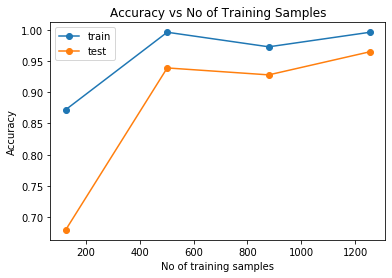

In [93]:
plt.figure()
plt.plot(training_sizes,train_acc,'o-', label='train')
plt.plot(training_sizes,test_acc, 'o-', label='test')
plt.xlabel('No of training samples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No of Training Samples')
plt.legend()
plt.show()

## The results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten.

## Activation Function 
1. Decides how the neuron fires and which output it produces 
2. Activation function impact learning time, making the model converge faster or slower, achieving higher or lower accuracy. 
3. They allow us to learn complex functions(complex patterns underlying the data)
4. Popular Activation Functions 
    - Sigmoid
        - Ouput btw (0 to 1)
        - Not recommended for Deep Models 
        - `sigmoid(x) = 1/(1 + np.exp(-x))`
    - tanh
        - Ouput btw (-1 to 1)
    - ReLU
        - `relu = max(x,0)`
        - It gives sharp boundaries
        - Good First choice 
    - leaky_ReLU 
        - `leak_relu(x) = max(x, alpha*x)`; alpha = 0.01
            - It suppress the negative values 
5. How to choose Activation Functions ? It depends on 
    - Problem in hand
    - Layer for which you want to consider(Goal to achieve from layer)
        - Relu is not used for output layer but good choice for hidden layers
    - Ouput you want to achieve
        - For multi-class classification, we prefer softmax activation


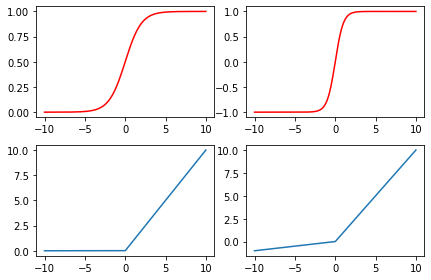

In [20]:
# Activation Function 
x_values = np.linspace(-10, 10, num = 1000)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def leaky_relu(x, alpha=0.1):
    return np.maximum(x, alpha*x)

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].plot(x_values, sigmoid(x_values), 'r')
axes[0,1].plot(x_values, tanh(x_values), 'r')
axes[1,0].plot(x_values, relu(x_values))
axes[1,1].plot(x_values, leaky_relu(x_values))

fig.tight_layout()

## Effect of Different Activation functions 

In [7]:
# irrigation data
X_train, X_test, y_train, y_test = train_test_split(irrigation_features, irrigation_target, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 20) (1600, 3)
(400, 20) (400, 3)


In [9]:
# Define the model for irrigation data 

def get_irrigation_model(act_name):
    if act_name not in ['relu', 'leaky_relu', 'sigmoid', 'tanh']:
        raise ValueError('Give correct Activation function')    
    model = Sequential()
    if act_name is 'leaky_relu':
        act_name = tf.keras.layers.LeakyReLU(alpha=0.3)
    model.add(Dense(64, activation=act_name, input_shape=(20,)))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
activation_fn_list = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
np.random.seed(42)

results_dict = {}
for activation in activation_fn_list:
    model = get_model(activation)
    hist = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, verbose=False)
    results_dict[activation] = hist

In [57]:
val_loss_dict = {'relu': results_dict['relu'].history['val_loss'], \
                 'tanh': results_dict['tanh'].history['val_loss'],\
                'sigmoid': results_dict['sigmoid'].history['val_loss'],\
                 'leaky_relu': results_dict['leaky_relu'].history['val_loss']}

val_acc_dict = {'relu': results_dict['relu'].history['val_accuracy'], \
                 'tanh': results_dict['tanh'].history['val_accuracy'],\
                'sigmoid': results_dict['sigmoid'].history['val_accuracy'],\
                 'leaky_relu': results_dict['leaky_relu'].history['val_accuracy']}

In [58]:
val_loss_df = pd.DataFrame(val_loss_dict)
val_loss_df

,relu,tanh,sigmoid,leaky_relu
0,0.504169,0.476997,0.561594,0.452930
1,0.391965,0.396202,0.507217,0.364648
2,0.340224,0.356514,0.461516,0.329593
3,0.309616,0.334053,0.423503,0.314244
4,0.288005,0.316774,0.394479,0.305204
...,...,...,...,...
95,0.237181,0.227949,0.213108,0.216528
96,0.241142,0.231739,0.211894,0.217886
97,0.237181,0.230065,0.212610,0.221571
98,0.240106,0.228292,0.211935,0.220930


In [60]:
val_acc_df = pd.DataFrame(val_acc_dict)
val_acc_df

,relu,tanh,sigmoid,leaky_relu
0,0.5950,0.6425,0.2725,0.6125
1,0.6650,0.6925,0.4200,0.6600
2,0.7425,0.6625,0.5575,0.6300
3,0.6575,0.7000,0.6425,0.6625
4,0.7075,0.6425,0.7050,0.6425
...,...,...,...,...
95,0.6125,0.6000,0.6525,0.5950
96,0.5400,0.6450,0.6925,0.6825
97,0.5750,0.5875,0.6500,0.6375
98,0.5825,0.5925,0.6500,0.6675


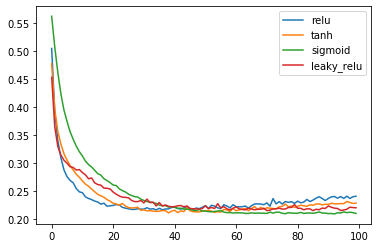

In [61]:
val_loss_df.plot()

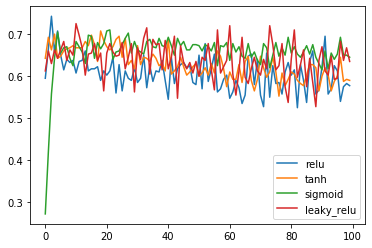

In [62]:
val_acc_df.plot()

## Sigmoid seems to perform better for this data

## Batch | Mini Batch 
1. Total Population = Total no. of samples 
2. Mini Batch
    - A small sample from the total population 
3. Batch_size
    - No of samples in each Mini Batch 
    - Batch size can be 1,2,3,.. k, ... N 
4. So we start at some point on the loss and weights curve and we have to reach the global minimum. 
    - When we make update using the complete population, we get exact direction in which we should move to find the minima. But this can also lead us to local minima. We can say here we get the exact path of minima.
    - When we take only sample of Population to make an update, we only get a idea about the direction where to move, So here there is lot of noise also, we don't follow the exact path to minima. There is noise but in the end we reach nearby to the minima.
    - **Path towards the minimum value is more noiser with smaller the batch size( small batch more noise)**

5. Advantage of Batches 
    - Faster Training( weights will be updated after feed-forward of each mini-batch, not waiting for complete population to be seen first.( More updates in same amount of time )  
    - Less RAM required ( large datasets are memory expensive, if we do training in batches, then at a time we need to keep only small batch size in the memory.)
    - **Noise produced by mini-batch updates can help us escape the local minima.**
6. Disadvantage
    - Need more no of iterations (WhY ??)
    - Need to find a good batch size
        - **RULE of THUMB: Bigger the dataset, keep Batch size bigger**
7.Code 
    - `model.fit(X_train, y_train, batch_size = 5)`
    - Default value of batch_size = 32
    - General practice is to use batch_size in power of 2: 2,4,8,16,...

## Normalization 
1. Bringing different features to same scale 
2. Doing normalization in DL is also good thing
    - This avoid problems with Activation functions and Gradient (**WHAT KIND OF PROBLEM?? NOT CLEAR**)
    - JUST A THOUGHT: Say we have 2 features, feat-1 and feat-2. 
        - feat-1 has very high values in range of 10k-20k vs feat-2 has values in range (10-100).
        - Now weight input( z= w1*x1 + w2*x2 +..) will be high due to feat-1 high values.
        - In case of sigmoid and tanh activation, sigmoid(z) if z >>0 then sigmoid(z) ~ 1/-1.
        - It means point will lie where curve is almost flat in sigmoid and tanh, at flat portion we see problem of vanishing gradients(slow learning)
        - That's why lack of normalization can lead to problems with Activation fn and Gradient.
3. Standard Normalization 
    - ` x' = (x - mean)/std`
    
## Batch Normalization ??
1.https://www.youtube.com/watch?v=nUUqwaxLnWs
2. See the video in Datacamp Tutorial 
3. In keras applied as layer. 
 ### `Can it brings stability in learning curves ?`
 1. Check with irrigation model

## Visualizing the effect of different batch size
1. Time of training: Faster training with mini batch as compared to complete batch 
2. Noise produce by small batch_size more than the large batch size

In [9]:
# darts data 
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [11]:
darts_features = darts.drop(columns='competitor').values
print(darts_features.shape)
target = darts['competitor'].values
# convert string to numbers 
target = pd.Categorical(target)
target = target.codes
darts_target = to_categorical(target)
print(darts_target.shape)
print(darts_target[:5])

(800, 2)
(800, 4)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(darts_features, darts_target, \
                                                   test_size=0.1, stratify=darts_target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(720, 2) (720, 4)
(80, 2) (80, 4)


In [18]:
darts_model = Sequential()
darts_model.add(Dense(64, activation='relu', input_shape=(2,)))
# model2.add(Dense(32, activation='relu'))
darts_model.add(Dense(4, activation='softmax'))

# model compilation
darts_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
initial_wts = darts_model.get_weights()

In [24]:
batch_size_list = [1, 8, 16, 32, 64, 128, 512, 720]
history_list =[]
# np.random.seed(42)
for batch_size in batch_size_list:
    darts_model.set_weights(initial_wts)
#     model = get_irrigation_model('relu')
    hist_obj = darts_model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), verbose=False)
    history_list.append(hist_obj)

In [22]:
train_loss = {'bz-1': (history_list[0].history['loss']),
             'bz-8': history_list[1].history['loss'],
             'bz-16': history_list[2].history['loss'],
             'bz-32': history_list[3].history['loss'],
             'bz-64': history_list[4].history['loss'],
             'bz-128': history_list[5].history['loss'],
             'bz-512': history_list[6].history['loss'],
             'bz-720': (history_list[7].history['loss'])}
train_loss_df = pd.DataFrame(train_loss)

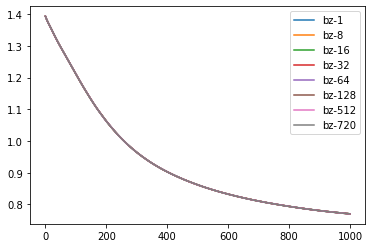

In [23]:
train_loss_df.plot()

### I was trying to visualize the noise effect in training due to batch size but something missing 
1. Try with the irrigation model

In [26]:

val_loss = {'bz-1': (history_list[0].history['val_loss']),
#              'bz-8': history_list[1].history['loss'],
#              'bz-16': history_list[2].history['loss'],
#              'bz-32': history_list[3].history['loss'],
#              'bz-64': history_list[4].history['loss'],
#              'bz-128': history_list[5].history['loss'],
#              'bz-512': history_list[6].history['loss'],
             'bz-720': (history_list[7].history['val_loss'])}
val_loss_df = pd.DataFrame(val_loss)
val_loss_df

,bz-1,bz-720
0,1.390922,1.390803
1,1.388118,1.387791
2,1.385351,1.385055
3,1.382742,1.382428
4,1.380318,1.379970
5,1.377951,1.377657
6,1.375656,1.375367
7,1.373489,1.373156
8,1.371315,1.371072
9,1.369143,1.369055


#### Effect of Batch size 
1. 2 exactly same models are trained with different batch size. 
2. See below the effect of batch size on training and testing accuracy. 
3. Training is faster with small batch size 

In [47]:
darts_model_1 = Sequential()
darts_model_1.add(Dense(64, activation='relu', input_shape=(2,)))
# model2.add(Dense(32, activation='relu'))
darts_model_1.add(Dense(4, activation='softmax'))

# model compilation
darts_model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
hist_1 = darts_model_1.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
720/720 [==============================] - 1s 2ms/step - loss: 1.3684 - accuracy: 0.2986
Epoch 2/5
720/720 [==============================] - 1s 2ms/step - loss: 1.3051 - accuracy: 0.4194
Epoch 3/5
720/720 [==============================] - 1s 2ms/step - loss: 1.2538 - accuracy: 0.4778
Epoch 4/5
720/720 [==============================] - 1s 2ms/step - loss: 1.2022 - accuracy: 0.4875
Epoch 5/5
720/720 [==============================] - 1s 2ms/step - loss: 1.1542 - accuracy: 0.5000


In [49]:
darts_model_1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 1.1126 - accuracy: 0.6125


[1.1126391887664795, 0.612500011920929]

In [54]:
darts_model_2 = Sequential()
darts_model_2.add(Dense(64, activation='relu', input_shape=(2,)))
# model2.add(Dense(32, activation='relu'))
darts_model_2.add(Dense(4, activation='softmax'))

# model compilation
darts_model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
hist_2 = darts_model_2.fit(X_train, y_train, batch_size=720, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 3ms/step - loss: 1.4009 - accuracy: 0.1847
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 1.4008 - accuracy: 0.1833
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 1.4007 - accuracy: 0.1833
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 1.4006 - accuracy: 0.1847
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 1.4005 - accuracy: 0.1847


In [57]:
darts_model_2.evaluate(X_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 1.4039 - accuracy: 0.1750


[1.4039053916931152, 0.17499999701976776]

#### Model with small batch-size trains faster, for same no. of epochs

## Batch Normalization 
1. Seeing the effect of Batch Norm on model training 

In [81]:
# Import batch normalization from keras layers
from tensorflow.keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
batchnorm_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 50)                3250      
_________________________________________________________________
batch_normalization_9 (Batch (None, 50)                200       
_________________________________________________________________
dense_43 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_10 (Batc (None, 50)                200       
_________________________________________________________________
dense_44 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_11 (Batc (None, 50)                200       
_________________________________________________________________
dense_45 (Dense)             (None, 10)              

In [83]:
# Build your deep network
std_model = Sequential()
std_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
std_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
std_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
std_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
std_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
# Training both the models on digits data 
print(digits.shape)
digits[:1]

(1797, 64)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [85]:
digits_targets
digits_labels = to_categorical(digits_targets)
digits_labels[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [86]:
h1_callback = batchnorm_model.fit(digits, digits_labels, epochs=10, validation_split=0.2, verbose=0)

In [87]:
h2_callback = std_model.fit(digits, digits_labels, epochs=10, validation_split=0.2, verbose=0)

In [90]:
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['accuracy'])
  plt.plot(h1.history['val_accuracy'])
  plt.plot(h2.history['accuracy'])
  plt.plot(h2.history['val_accuracy'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

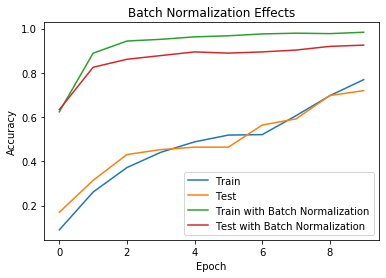

In [91]:
compare_histories_acc(h2_callback, h1_callback)

#### You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.

## Hyper Parameter in Deep learning 
1. Parameter Related to model and architecture
2. Not trainable from data 
3. Examples
    - Number oflayers
    - Number of neurons per layer
    - Layer order
    - Layer activations
    - Batch sizes
    - Learning rates
    - Optimizers
    - many more 
## Hyper Parameter Tunning 
1. Same as we did in the sklearn using GridSearch or RandomisedSearch 
    - Requirement: We need to **convert our deep learning Keras model into Sklearn estimator**
2. Convert DL model to Sklearn Estimator 
    1. Define a function that creates your model 
        -  The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.
    2. Create a sklearn estimator
        - To convert DL model to sklearn estimator we will use keras scikit learn wrapper
        - `from keras.wrappers.scikit-learn import KerasClassifier`
        - `model = KerasClassifier(estimator=create_model(), batch_size=16, epochs=50)`
    3. Define parameters in a dictionary with values you want to try out
        - `params:{'param1': [1,2,3], 'param2': [x,y,z]}`
3. Now use this Sklearn estimator in RandomizedSearchCV 

4. Use Sklearn estimator in cross_val_score 

### Tip for Hyper Parameter tuning 
1. Random search is preferred over grid search
2. Don't use many epochs
3. Use a smaller sample of your dataset
4. Play with batch sizes, activations, optimizers and learning rates
**Note: All these things because we want an idea about which thing is better than other, so small dataset, small epochs and Random Search can do that for us** 

In [6]:
## Define the function that creates the mode
# The definition of this function is important since
# hyperparameter tuning is carried out by varying the arguments your function receives.
def create_model(learning_rate, activation):
    opt = tf.keras.optimizers.Adam(learning_rate= learning_rate)
    model = Sequential()
    model.add(Dense(128, activation = activation, input_shape=(30,)))
    model.add(Dense(256, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = opt, loss= tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
    return model

In [7]:
# Wrapper to convert DL model to Scikit learn classifier estimator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [8]:
# model = KerasClassifier(build_fn= create_model, epochs=6, batch_size=16 )
# if we are tuning the batch_size and epochs then no need to specify them here, as we did
model = KerasClassifier(build_fn= create_model)
# This model is the scikit learn estimator and can be used for Cross validation and Hyper Parameter Tuning

In [9]:
# Define the parameters you want to try 
params = {'learning_rate': [0.1, 0.01, 0.001], 'activation': ['relu', 'tanh'],\
          'batch_size': [32, 128, 256],  'epochs': [50,100,200]}
params

{'learning_rate': [0.1, 0.01, 0.001],
 'activation': ['relu', 'tanh'],
 'batch_size': [32, 128, 256],
 'epochs': [50, 100, 200]}

In [10]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [11]:
rsearch = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3)

In [12]:
from sklearn import datasets

In [13]:
cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
cancer_features = cancer_df.values 
cancer_targets = cancer.target
print(cancer_features.shape, cancer_targets.shape)

(569, 30) (569,)


In [16]:
Counter(cancer_targets)

Counter({0: 212, 1: 357})

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(cancer_features)

StandardScaler()

In [19]:
norm_features = scaler.transform(cancer_features)

In [20]:
norm_features[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [26]:
# Perform the tunning 
results = rsearch.fit(norm_features, cancer_targets)

Epoch 1/200
3/3 [==============================] - 0s 3ms/step - loss: 8.6690 - accuracy: 0.5356
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 9.5869 - accuracy: 0.8628
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9453 - accuracy: 0.9789
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 1.1467 - accuracy: 0.9736
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.9631
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9102 - accuracy: 0.9815
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.9947
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.9710
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 2.8839 - accuracy: 0.9763
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 1.4014 - accuracy: 0.9921
Epoch 11/200
3/3 [===========

In [28]:
results.best_params_

{'learning_rate': 0.001,
 'epochs': 200,
 'batch_size': 128,
 'activation': 'relu'}

In [30]:
best_model= results.best_estimator_

In [32]:
best_model.score(norm_features, cancer_targets)

5/5 [==============================] - 0s 2ms/step - loss: 1.1827e-04 - accuracy: 1.0000


1.0

In [21]:
# Use the Sklearn Estimator in cross_val_score
model_2 = KerasClassifier(build_fn= create_model(learning_rate=0.01, activation='relu'),\
                         epochs=50, batch_size=128,verbose=0)

In [22]:
print(norm_features.shape, cancer_targets.shape)

(569, 30) (569,)


In [23]:
import sklearn
sklearn.__version__

'0.23.2'

In [24]:
kfolds_results = cross_val_score(model_2,norm_features, cancer_targets, cv=3)

TypeError: can't pickle _thread.RLock objects

## Tensors 
1. Tensors are main data structures in the deep learning 
2. It is a Multi-Dimensional Array of numbers 
3. Input, output, transformation, everything is represented as tensors

## Keras Layers 
1. We can extract different layers and weights from a defined keras model (see below)

In [6]:
sample_model = Sequential()
sample_model.add(Dense(4, activation='relu', input_shape=(2,)))
sample_model.add(Dense(4, activation='relu'))
sample_model.add(Dense(1, activation='sigmoid'))
sample_model.compile(optimizer='adam', loss='binary_crossentropy')
sample_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Extract layers and weights from model
first_layer = sample_model.layers[0]
first_layer # Dense Layer 

In [21]:
print(first_layer.input) # Tensor class object: input tensor from first layer
print(first_layer.output) # Tensor class object: output tensor from first layer
print(first_layer.weights) # Weights and bias Tensorflow Variable objects, that can be trained

Tensor("dense_input:0", shape=(None, 2), dtype=float32)
Tensor("dense/Relu:0", shape=(None, 4), dtype=float32)
[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[-0.49572253, -0.43853426,  0.71780586, -0.58879924],
       [ 0.72861767, -0.34141493,  0.6528187 ,  0.49931192]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]


### Import Keras backend which is 'tensorflow' and define the FUNCTION 
1. `backend.function()`
    - Need to define the inputs and outputs while defining the function.
    - In inputs goes the 'layerA' of model and in outputs goes the same/another 'layerB' of model 
    - When using the function, we will give input a tensor with same shape as input of 'layerA' and we will get the ouput as tensor with same shape as output from the 'layerB'.
2. This provides a kind of mapping from one layer to other. 
    - This is a useful tool when we want to obtain the output of a network at an intermediate layer.
3. If the weights change during training, the output changes accordingly 

In [9]:
from tensorflow.keras import backend

In [10]:
# With this backend we can define a function 
# Input: tensor from a layer A
# Output: tensor from a layer A/B 

In [18]:
inp0 = sample_model.layers[0].input 
out0 = sample_model.layers[0].output

out2 = sample_model.layers[2].output 

<tf.Tensor 'dense_2/Sigmoid:0' shape=(None, 1) dtype=float32>

In [12]:
inp_to_out = backend.function(inputs=[inp0], outputs=[out2])
inp_to_out
# This function will take input of same shape as the input of first layer and
# gives output same as output of last layer.
# If the weights change during training, the output changes accordingly 

<function tensorflow.python.keras.backend.function.<locals>.func(model_inputs)>

In [13]:
sample_input = np.array([[1.0, 2.0]])
sample_input.shape

(1, 2)

In [14]:
sample_model.predict(sample_input)

array([[0.79080063]], dtype=float32)

In [15]:
inp_to_out([sample_input])

[array([[0.79080063]], dtype=float32)]

#### We can see this function `inp_to_out` is also giving same output as `.predict()` method. This function has created a mapping from one input layer to same/other output layer. 
**Note: With this we can get the results of any hidden layer**

In [16]:
# get results of second hidden layer 
inp = sample_model.layers[0].input
out = sample_model.layers[1].output
inp_to_out_2 = backend.function(inputs=[inp], outputs=[out])

In [17]:
inp_to_out_2([sample_input])
# This shows the results/outcomes/activations of second hidden layer

[array([[1.1511981, 0.       , 0.       , 1.0829585]], dtype=float32)]

## Autoencoders 
1. They are a kind of Neural Networks
2. No. of input neurons == No. of output neurons (Output size = Input size)
3. They itself are not important.
4. In these N.N middle hidden layers are small in size than Input and Outpu layer.
    - We learn to represent the input in a smaller representation. 
    - Hidden layer of small size will be used a smaller representation of input. 
5. Applications 
    1. Dimensionality Reduction 
        - Smaller dimensional representation of our inputs.
    2. De-noising Data 
        - We train auto encoder with clean data
        - When fed with some noisy data, output is data without noise 
    3. Anomaly Detection 
        - Train to map  input to output.
        - When fed with strange input, it fails to give accurate output values.
6. How to build ? 
    - Same as other N.N with Input = Ouput (same no of neurons in both layers)

In [3]:
autoencoder = Sequential()
autoencoder.add(Dense(4, input_shape=(100,), activation='relu')) # input = 100, hidden_layer= 4
autoencoder.add(Dense(100, activation='sigmoid')) # ouput = 100

autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # binary_crossentropy with sigmoid

In [4]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 404       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               500       
Total params: 904
Trainable params: 904
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Now we can train this autoencoder 

## Build an Encoder out of Autoencoder. 
1. Encoder is the same as autoencoder just its ouput layer = hidden layer of Autoencoder 
2. Encoder = Some Continous layers of Autoencoder starting from input layer

In [6]:
encoder = Sequential()
# we can add layers of Autoencoder into this encoder 
encoder.add(autoencoder.layers[0]) # added first layer of autoencoder input=100, output=4
# So this encoder encodes data of size=100 to size=4

In [7]:
sample_input = np.random.random_sample((1,100))
sample_input.shape

(1, 100)

In [8]:
encoder.predict(sample_input)

array([[1.128766  , 0.21984771, 0.01134085, 0.        ]], dtype=float32)

## Neural Separation : Seeing the output of hidden layers 

In [14]:
# Use banknotes data 
print(banknotes_features.shape)
print(banknotes_target.shape)
print(banknotes_target[:5])
print(Counter(banknotes_target))

(1372, 4)
(1372,)
[0 0 0 0 0]
Counter({0: 762, 1: 610})


In [16]:
X_train, X_test, y_train, y_test = train_test_split(banknotes_features, banknotes_target, test_size=0.2,\
                                                   stratify = banknotes_target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1097, 4) (1097,)
(275, 4) (275,)


In [49]:
# Define a small model for it 
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(4,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Define a mapping from input layer to first hidden layer 
inp_to_out = tf.keras.backend.function(inputs= [model.layers[0].input], \
                                      outputs= [model.layers[0].output])
hidden_layer_output= inp_to_out([X_test])

In [51]:
type(hidden_layer_output[0])

numpy.ndarray

In [52]:
def plot_neural_separation(layer_output, y_test, test_accuracy):
  fig, ax = plt.subplots()
  plt.scatter(layer_output[:, 0], layer_output[:, 1],c = y_test,edgecolors='none')
  plt.title('Epoch: {}, Test Accuracy: {:3.1f} %'.format(i+1, test_accuracy * 100.0))
  plt.show()

9/9 [==============================] - 0s 1ms/step - loss: 0.6338 - accuracy: 0.7309


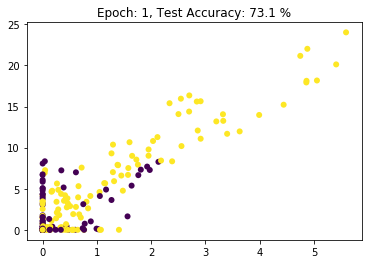

9/9 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.7673


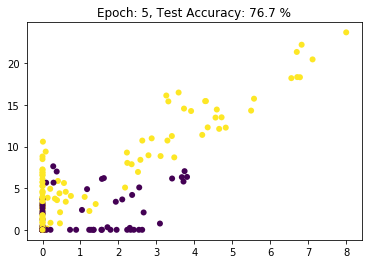

9/9 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8364


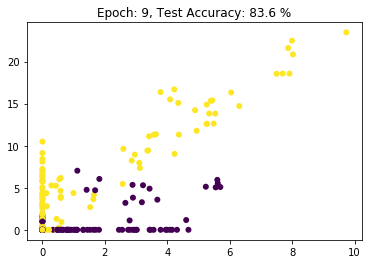

9/9 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.8764


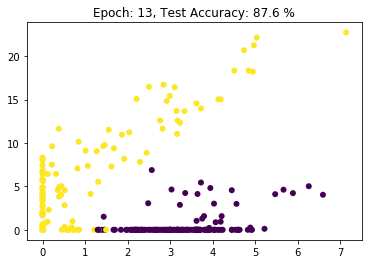

9/9 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9055


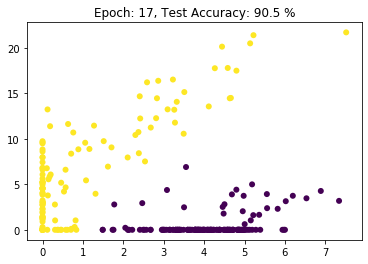

9/9 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9200


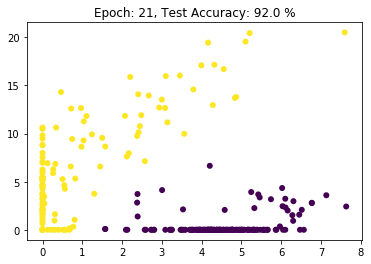

In [53]:
# We will train our model and while training we will plot the output of first layer neurons.

for i in range(0,21):
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    
    if i%4 == 0:
        hidden_layer_output = inp_to_out([X_test])[0]
        accuracy = model.evaluate(X_test,y_test)[1]
        plot_neural_separation(hidden_layer_output, y_test, accuracy)

#### We have plotted the output of two neurons of hidden layer for each example after every epoch(color specifies the class to which example belongs
1. We can say we have reduce the dimensionality of input data points from 4-d to 2-d and then plotted them.
2. If you observe, initially the data points of two classes are mixed up, then after each step of training the data points become separable.
3. You can see how the `neurons are learning to spread out the inputs based on whether they are fake or legit dollar bills`. (A single fake dollar bill is represented as a purple dot in the graph) 
    - At the start the outputs are closer to each other, the weights are learned as epochs go by so that fake and legit dollar bills get a different, further and further apart output

## AutoEncoder 
1. It is worth noticing that in output layer we use `activation = sigmoid`. 
    - WHY ??
2. With sigmoid as activation in output layer, recomended `loss = binarycrossentropy`

In [18]:
mnist.describe()

,label,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8,feat-9,...,feat-775,feat-776,feat-777,feat-778,feat-779,feat-780,feat-781,feat-782,feat-783,feat-784
count,2001.000000,2001.0,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,...,2001.00000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,4.454273,0.0,0.000050,0.000100,0.000150,0.000200,0.000250,0.000300,0.000350,0.000400,...,0.04878,0.000304,0.000305,0.000305,0.000306,0.000306,0.000307,0.000307,0.000308,0.000308
std,2.895001,0.0,0.002236,0.004471,0.006707,0.008942,0.011178,0.013413,0.015649,0.017884,...,2.16848,0.013614,0.013637,0.013659,0.013681,0.013704,0.013726,0.013748,0.013771,0.013793
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,0.0,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,...,97.00000,0.609000,0.610000,0.611000,0.612000,0.613000,0.614000,0.615000,0.616000,0.617000


In [63]:
sum(sum(mnist_features))

52069613.413000025

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [70]:
scaler = MinMaxScaler()
scaler.fit(mnist_features)
features = scaler.transform(mnist_features)
features.shape

(2001, 784)

In [71]:
sum(sum(features))

204413.9341474728

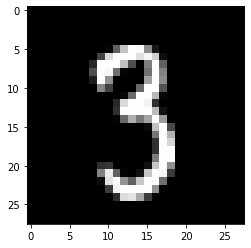

In [75]:
plt.imshow(np.reshape(mnist_features[2], newshape=(28,28)), cmap='gray')
plt.show()

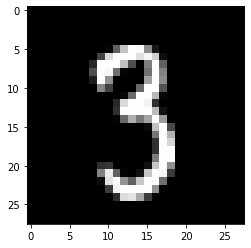

In [19]:
# GET Images data 
X_test = np.load("datasets/MNIST/X_test_MNIST.npy")
y_test = np.load("datasets/MNIST/y_test_MNIST.npy")
X_test_noise = np.load("datasets/MNIST/X_test_MNIST_noise.npy")
img = np.reshape(mnist_features[2], newshape=(28,28))
plt.imshow(img, cmap='gray')

In [20]:
print(mnist_features.shape, mnist_labels.shape)
print(X_test.shape, y_test.shape)
print(X_test_noise.shape)

(2001, 784) (2001,)
(100, 784) (100,)
(100, 784)


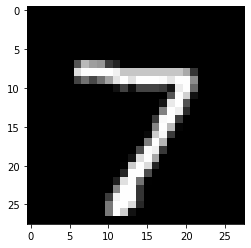

In [21]:
plt.imshow(np.reshape(X_test[0], newshape=(28,28)), cmap='gray')

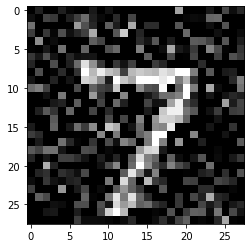

In [22]:
plt.imshow(np.reshape(X_test_noise[0], newshape=(28,28)), cmap='gray')

In [101]:
# Build an autoencoder for mnist data 
autoencoder = Sequential()
autoencoder.add(Dense(32, activation = 'relu', input_shape=(784,)))
autoencoder.add(Dense(784, activation = 'sigmoid'))

# compile it
autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.binary_crossentropy,\
                   metrics=['accuracy'])
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [102]:
autoencoder.evaluate(features, features)

63/63 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 4.9975e-04


[0.6965320706367493, 0.0004997501382604241]

In [103]:
autoencoder.evaluate(X_test_noise, X_test_noise)

4/4 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.0100


[0.6960124969482422, 0.009999999776482582]

In [104]:
early_stop = EarlyStopping(patience=5)
model_checkpt = ModelCheckpoint("models/autoencoder_digits.h5", save_best_only=True)

In [105]:
# Train the autoencoder 
hist = autoencoder.fit(features, features, validation_split=0.2, epochs=100000, \
                      callbacks=[early_stop, model_checkpt], verbose=0)

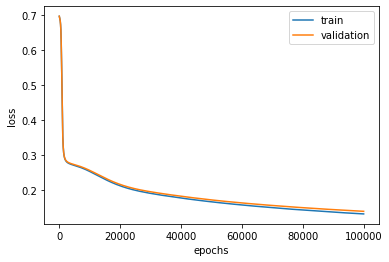

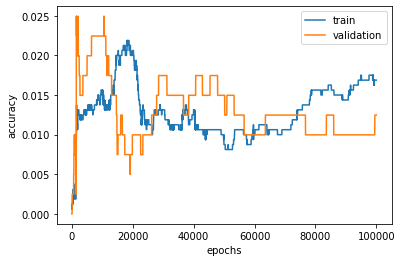

In [115]:
# learning curves 
loss = hist.history['loss']
val_loss = hist.history['val_loss']
fig = plt.figure()
plt.plot(loss, label='train')
plt.plot(val_loss,label= 'validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

loss = hist.history['accuracy']
val_loss = hist.history['val_accuracy']
fig = plt.figure()
plt.plot(loss, label='train')
plt.plot(val_loss,label= 'validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Visualize the effect of Autoencoder. 
1. AutoEncoder encodes the images and then decodes them 
    - Check how well autoencoder reconstructs the images(decodes them)
2. Applications 
    1. De-noising Data 
        - When trained with clean data, autoencoder learns to reconstruct the relevant part of image 
        - When noisy image is supplied to it, autoencoder removes the noise from image

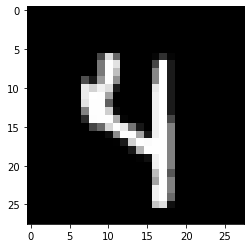

(1, 784)


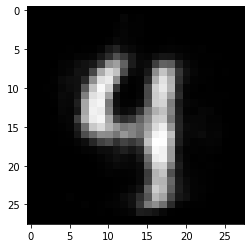

In [122]:
num= 1
sample_image = features[num]
plt.figure()
plt.imshow(np.reshape(sample_image,newshape=(28,28)), cmap='gray')
plt.show()
reconstructed = autoencoder.predict(np.reshape(sample_image,newshape=(-1, 784)))
print(reconstructed.shape)
plt.imshow(np.reshape(reconstructed,newshape=(28,28)), cmap='gray')
plt.show()

In [108]:
autoencoder.evaluate(features, features)

63/63 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.0160


[0.13300004601478577, 0.015992004424333572]

In [130]:
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()
    
    
def show_encodings(encoded_imgs,originals, number=1):
    n = 5  # how many digits we will display
    original = originals #X_test_noise
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [124]:
decoded_images = autoencoder.predict(X_test_noise)

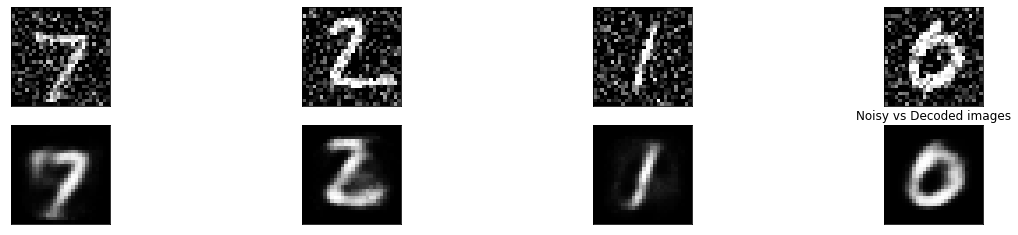

In [125]:
compare_plot(X_test_noise, decoded_images)

In [126]:
## Build the encoder by taking the first layer of encoder 
encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [127]:
encodings = encoder.predict(X_test_noise)

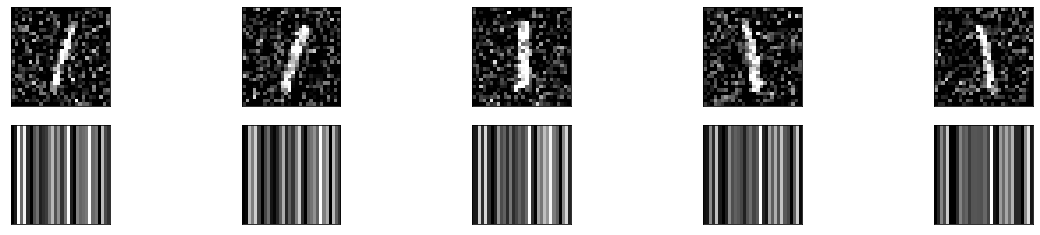

In [131]:
show_encodings(encodings, X_test_noise)

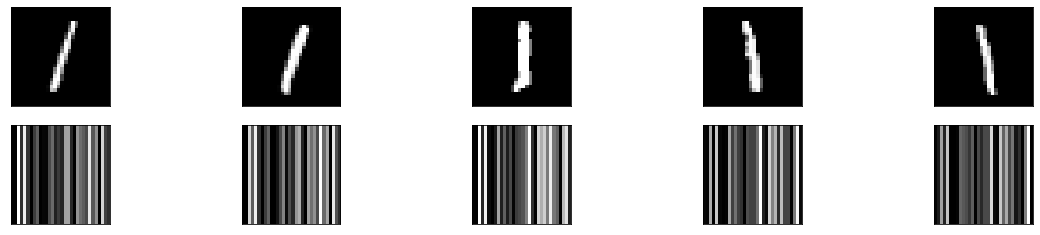

In [132]:
encodings_2 = encoder.predict(X_test)
show_encodings(encodings_2, X_test)

## Convolutional Neural Network(CNN)
1. Type of Deep Learning Neural Network
2. CNN must have `Convolutional Layers` along with other layers 
3. Convoluation Layers 
    - Performs convolution operation on the input. 
    - `Convolution`: It is  a mathematical operation. It preserves `Spatial Relationships`
    - Each layer has certain no of `Kernels or masks or filters`. 
    - At each layer, Convolution is performed using `Kernels` on input and output is produced for each kernel. 
    - In case input = image, output is also image with certain characterstics amplified depending on Kernel used.
        - If we have input_shape = (28,28,1) and we apply 4 kernels of size (3,3) then for each kernel an output is produced leading to a output of shape = (26,26, 4), third dimension has value =4 signifies the no of kernels used on the input. 
4. CNN works well in case of images 
    - When convolution operation applied on the images, it can detect relevant areas of interest like edges, vertical lines, horizontal lines, corners etc. depending on what kernel you are using. 
    - If we use a Kernel of shape = (3,3) with main diagonal elements all 1 and other elements =0 then this kernel can detect diagonal lines in the image.
5. Convolution: 
    - We slide kernel over image.
    - At specific point, Kernel values are multiplied by the underlying images values and then summed up or averaged up. (similar to dot operation or taking weighted sum, `z = w1*x1 + w2*x2+...`
    - After doing the `weighted sum` we can apply activation function. 

6. CNN Training, helps network find the best values for filters to achieve a given task
7. General CNN Architecture
    1. Input layer 
    2. Convolutional Layers + Pooling ( one or more such layers, do the feature engineering)
    3. Flatten layer (to flatten the tensor)
    4. Fully connected layer (Dense layer: To do classification/regression task)

8. Images 
    - 3 Dimensional (Height, width , depth), `depth = channel`
    - Gray Scale image : 1 channel (black & white)
    - Color image : 3 channels ( R,G,B)
9. ImageNet Dataset
    - No of images > 14 Million
10. Transfer Learning 
    - Resnet 
        - 50 layers 
        - trained on ImageNet Dataset 
        - 

## Building CNN for image classification 

In [3]:
from tensorflow.keras.layers import Flatten, Conv2D

In [43]:
## Define the architecture 
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size=3, input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(filters= 16, kernel_size=3, activation='relu'))

# add the flatten layer 
model.add(Flatten())

# Add the fully connected layer 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                92170     
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


In [44]:
# compile the model 
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [45]:
# prepare the input for model 
print(mnist_features.shape, mnist_labels.shape)
scaler = MinMaxScaler()
norm_features = scaler.fit_transform(mnist_features)
mnist_labels[:5]

(2001, 784) (2001,)


array([5, 4, 3, 0, 2])

In [46]:
# Convert input to shape = (None, 28,28,1)
features = np.reshape(norm_features, newshape=(2001, 28,28,1))

# Convert labels to One hot encoding 
labels = to_categorical(mnist_labels)
print(features.shape, labels.shape)

(2001, 28, 28, 1) (2001, 10)


In [47]:
# Train the model 
early_obj = EarlyStopping(patience=10)
chkpt_obj = ModelCheckpoint("models/cnn_mnist.h5", save_best_only=True)

hist = model.fit(features, labels, callbacks=[early_obj, chkpt_obj], verbose=0, epochs=1000, validation_split=0.2)

In [51]:
model.evaluate(features, labels)
# Represent training accuracy

63/63 [==============================] - 1s 8ms/step - loss: 0.0848 - accuracy: 0.9875


[0.08479204028844833, 0.9875062704086304]

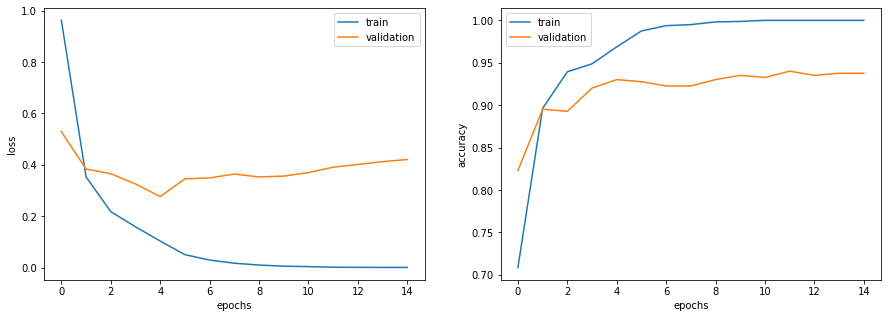

In [49]:
# Learnig curves 
plt.figure(figsize=(15,5))
ax = plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

#plt.imshow(original[i].reshape(28, 28))
#plt.gray()
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
        

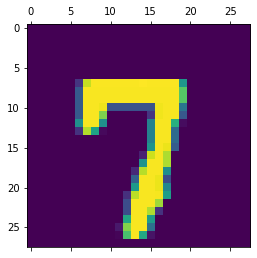

In [111]:
# .matshow method 
plt.matshow(features[13,:,:,0], cmap = 'viridis')

In [112]:
features[0,:,:,0].shape

(28, 28)

## Inspecting the activations of a convolutional layer

In [61]:
# Create a mapping from one layer to another layer 
# Same thing did with `backend.function`
from tensorflow.keras import backend, Model

inp_to_out = backend.function(inputs=[model.layers[0].input], outputs=[model.layers[0].output])

first_layer_out = Model(inputs = model.layers[0].input, outputs= model.layers[0].output)

In [114]:
sample_feature = np.reshape(features[13], newshape=(1,28,28,1))
# inp_to_out([sample_feature]) : Gives same output as below Model object
activations = first_layer_out.predict(sample_feature)

In [115]:
activations.shape

(1, 26, 26, 32)

In [116]:
kernels = model.layers[0].weights[0]

In [117]:
print(kernels.shape)
kernels[:,:,0,1].shape

(3, 3, 1, 32)


TensorShape([3, 3])

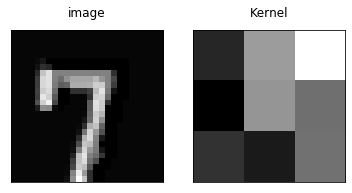

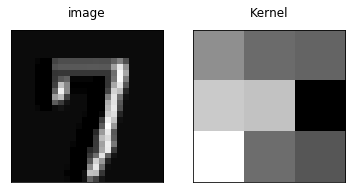

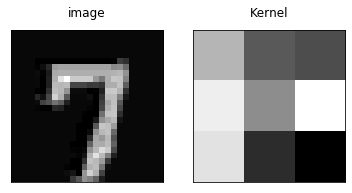

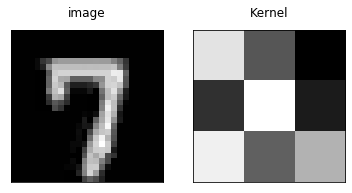

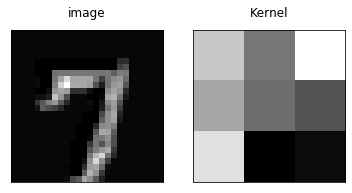

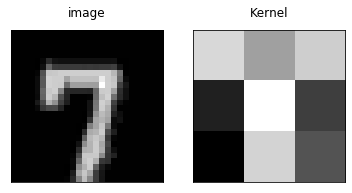

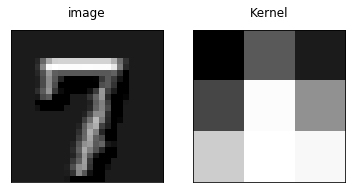

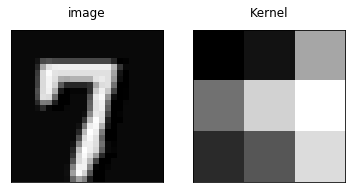

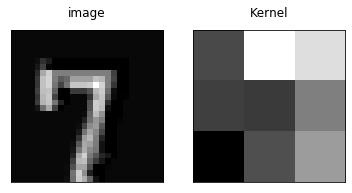

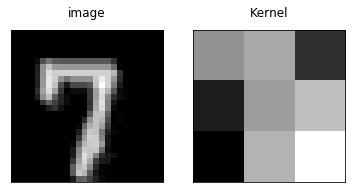

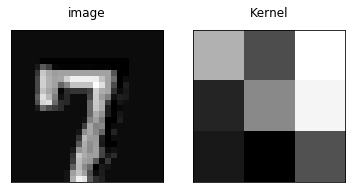

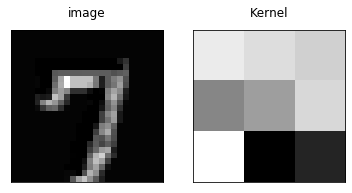

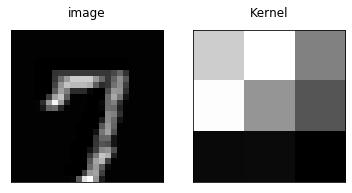

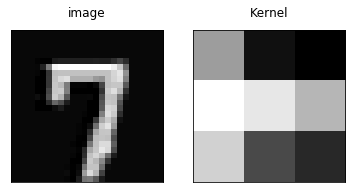

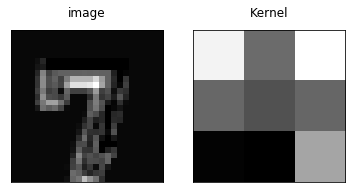

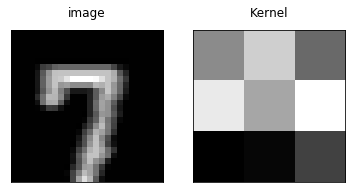

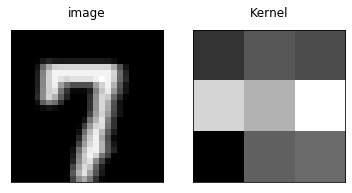

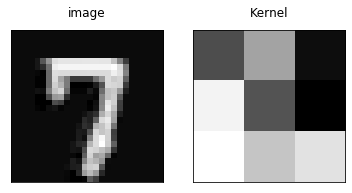

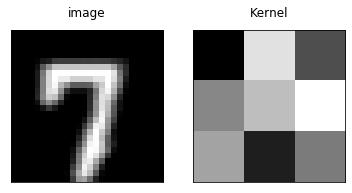

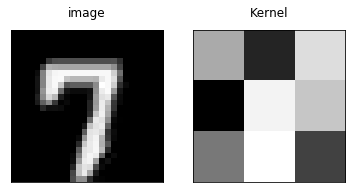

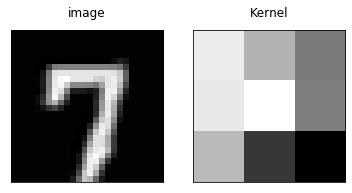

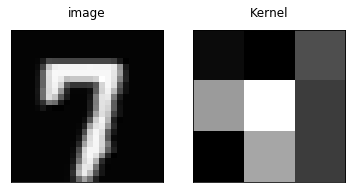

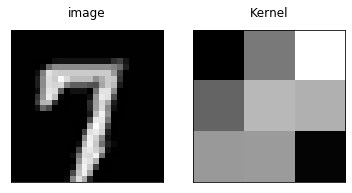

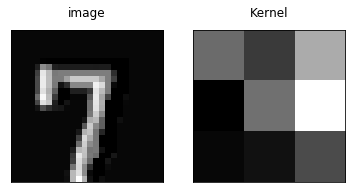

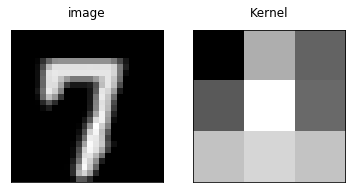

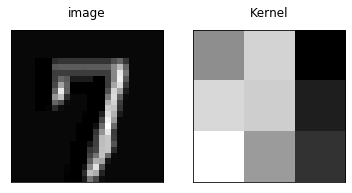

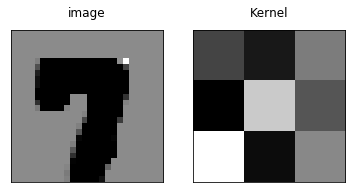

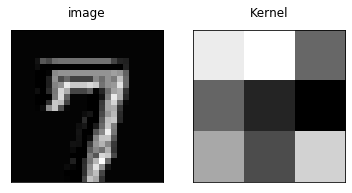

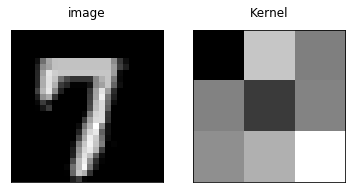

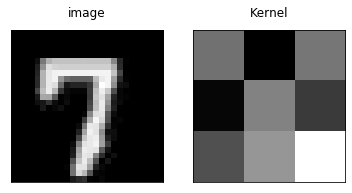

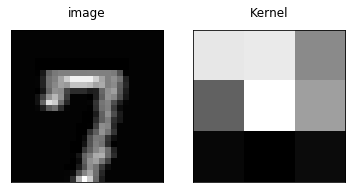

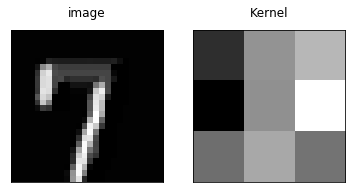

In [127]:
for i in range(32):
    ax = plt.subplot(1,2,1)
    ax.matshow(activations[0,:,:,i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('image')
    ax = plt.subplot(1,2,2)
    ax.matshow(kernels[:,:,0,i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Kernel')
    plt.show()

## ResNet | Transfer Learning

## LSTM: Long Short Term Memory 
1. Type of RNN 
2. RNN: Recurrent Neural Network 
    - It makes use of past predictions to make new predictions 
    - Application 
        - Where there is a dependence on past input 
3. LSTM Neurons 
    - 1 neuron of RNN ~ 1 unit ~ 1 cell 
    - Each cell has internal state which is passed to the other units 
        - Internal State can be interpreted as memory from past steps. 
        - Changing the internal state: 
            - Deleting things (from memory) which are not required
            - Keeping the important one only 
            - Adding the new information
    - `(previous unit) ---[prev-output, prev-internal-state]----++(new input) ---> (current unit)--(changes the state) ----[output, new-internal-state] ----++(next input) --->(next unit)`
4. Learning 
    - Units learn 
        - what to ignore 
        - what to keep 
        - select most important pieces of information from past
5. Application 
    1. Predict the next word in sequence 
    2. 